# 1) IMPORTING LIBRARIES


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 2) CLONING DATASET

In [1]:
# CLONING THE DATASET FROM THE GITHUB REPOSITORY
!git clone https://github.com/RishitToteja/Chext-X-ray-Images-Data-Set.git


Cloning into 'Chext-X-ray-Images-Data-Set'...
Updating files:   8% (191/2296)
Updating files:   9% (207/2296)
Updating files:  10% (230/2296)
Updating files:  11% (253/2296)
Updating files:  12% (276/2296)
Updating files:  13% (299/2296)
Updating files:  14% (322/2296)
Updating files:  15% (345/2296)
Updating files:  16% (368/2296)
Updating files:  17% (391/2296)
Updating files:  18% (414/2296)
Updating files:  18% (430/2296)
Updating files:  19% (437/2296)
Updating files:  20% (460/2296)
Updating files:  21% (483/2296)
Updating files:  22% (506/2296)
Updating files:  23% (529/2296)
Updating files:  24% (552/2296)
Updating files:  25% (574/2296)
Updating files:  26% (597/2296)
Updating files:  27% (620/2296)
Updating files:  28% (643/2296)
Updating files:  29% (666/2296)
Updating files:  30% (689/2296)
Updating files:  31% (712/2296)
Updating files:  32% (735/2296)
Updating files:  33% (758/2296)
Updating files:  34% (781/2296)
Updating files:  34% (785/2296)
Updating files:  35% (804/

In [4]:
import os

main_dir = "Chext-X-ray-Images-Data-Set/DataSet/Data"

# SETTING TRAIN AND TEST DIRECTORY
train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "test")

#SETING DIRECTORY FOR COVID AND NORMAL IMAGES DIRECTORY
train_covid_dir = os.path.join(train_dir, "COVID19")
train_normal_dir = os.path.join(train_dir, "NORMAL")

test_covid_dir = os.path.join(test_dir, "COVID19")
test_normal_dir = os.path.join(test_dir, "NORMAL")


In [5]:
# MAKING SEPERATE FILES :
train_covid_names = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)

test_covid_names = os.listdir(test_covid_dir)
test_normal_names = os.listdir(test_normal_dir)

# 3) DATA PREPROCESSING AND AUGMENTATION

In [9]:
# CREATING TRAINING, TESTING AND VALIDATION BATCHES

dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255,
                                     )

dgen_test = ImageDataGenerator(rescale = 1./255,
                              )

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size = (150, 150),
                                                      subset = "validation",
                                                      batch_size = 32,
                                                      class_mode = "binary")
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size = (150, 150),
                                               batch_size = 32,
                                               class_mode = "binary")




Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [10]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is : ", train_generator.image_shape)

Class Labels are:  {'COVID19': 0, 'NORMAL': 1}
Image shape is :  (150, 150, 3)


# 4) BUILDING CONVOLUTIONAL NEURAL NETWORK MODEL

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

# 1) CONVOLUTIONAL LAYER - 1
model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape))

# 2) POOLING LAYER - 1
model.add(MaxPooling2D(pool_size=(2,2)))

# 3) DROPOUT LAYER -2
model.add(Dropout(0.5))

# 4) CONVOLUTIONAL LAYER - 2
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))

# 5) POOLING LAYER - 2
model.add(MaxPooling2D(pool_size=(2,2)))

# 6) DROPOUT LAYER - 2
model.add(Dropout(0.5))

# 7) FLATTENING LAYER TO 2D SHAPE
model.add(Flatten())

# 8) ADDING A DENSE LAYER
model.add(Dense(256, activation = 'relu'))

# 9 DROPOUT LAYER - 3
model.add(Dropout(0.5))

# 10) FINAL OUTPUT LAYER
model.add(Dense(1, activation = 'sigmoid'))

### PRINTING MODEL SUMMARY
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)       

# 5) COMPILING AND TRAINING THE NEURAL NETWORK MODEL

In [12]:
# COMPILING THE MODEL

model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
# TRAINING THE MODEL
history = model.fit(train_generator,
                    epochs = 35,
                    validation_data = validation_generator)

Epoch 1/35


46/46 [==============================] - 65s 1s/step - loss: 0.8847 - accuracy: 0.7585 - val_loss: 0.5118 - val_accuracy: 0.7845
Epoch 2/35
46/46 [==============================] - 53s 1s/step - loss: 0.2599 - accuracy: 0.8951 - val_loss: 0.3719 - val_accuracy: 0.9337
Epoch 3/35
46/46 [==============================] - 54s 1s/step - loss: 0.1715 - accuracy: 0.9324 - val_loss: 0.2797 - val_accuracy: 0.9199
Epoch 4/35
46/46 [==============================] - 57s 1s/step - loss: 0.1728 - accuracy: 0.9372 - val_loss: 0.1424 - val_accuracy: 0.9586
Epoch 5/35
46/46 [==============================] - 53s 1s/step - loss: 0.1318 - accuracy: 0.9565 - val_loss: 0.1420 - val_accuracy: 0.9558
Epoch 6/35
46/46 [==============================] - 54s 1s/step - loss: 0.1235 - accuracy: 0.9565 - val_loss: 0.1447 - val_accuracy: 0.9448
Epoch 7/35
46/46 [==============================] - 55s 1s/step - loss: 0.1378 - accuracy: 0.9538 - val_loss: 0.1488 - val_accuracy: 0.9448
Epoch 8/35
46/46 [

# 6) PERFORMING EVALUATION


In [14]:
# KEYS OF HISTORY OBJECT
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

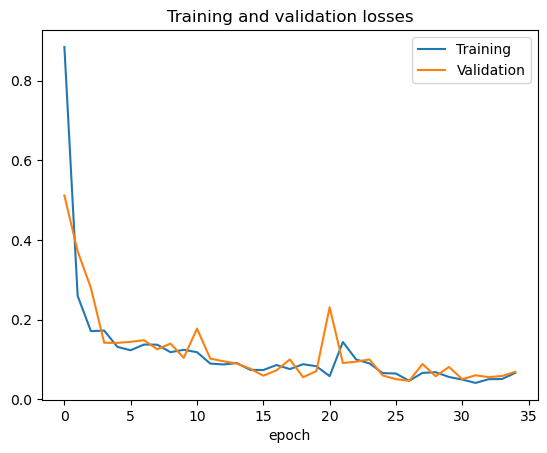

In [15]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

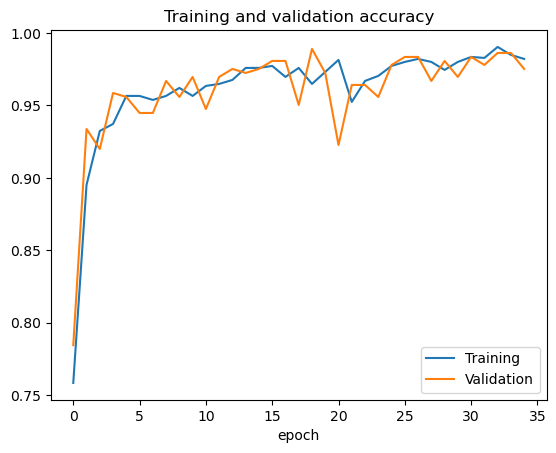

In [16]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [17]:
# GETTING TEST ACCURACY AND LOSS

test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

16/16 [==============================] - 12s 730ms/step - loss: 0.1040 - accuracy: 0.9566
Test Set Loss :  0.10404899716377258
Test Set Accuracy :  0.9566115736961365


In [25]:
model.save("model.h5")

C:\Users\omars\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
